# PROJECT SUPERSTORE TIME SERIES ANALYSIS
by: Kristofer Rivera, Oliver Ton - 04/21/2022

## Overview

Superstore's mission is to be the preferred supplier of workspace solutions; from home-office to cooperate office, we aspire to be the leading expert in workplace solutions for everyone! For this reason, it is important to know whether we are reaching everyone with our products and services. This project will use exploration, modeling to identify the best category for Superstore in regards to sales and will provide recommendations on where to shift our company focus in order to maintain happy loyal customers while continuing to grow our customer base.

## Goal

The goal of this project is to provide the SuperStore VP of Product with a data-backed recommendation for which product line to expand on. 


## Process

Upon successful acquistion of the *Superstore* dataset from the Codeup database. It was then transform into a series of DataFrames which could be used in exploration and model creation. From the initial query, 1734 rows and 22 columns were extracted. This was then filtered by removed id columns, renamed columns, changed the datatypes for order date and ship date, set order date as the index, and create new features (month, year). This left with 16 columns and 1730 rows to beign the exploration. From the exploration, we able to make the recommendation to expand our technology product line. Specifically, we recommend expanding our most profitable product types within the technology category which are copiers and machines. We built a forcasting model that demonstrated futurue sales growth in the technology category supporting our recommendation.

## Focused Questions

1. Which product category is the most profitable?

2. Is there a category that stands out in terms of sales volume?

3. Does profitability and sales vary by customer segment?

4. How does the sales and volume and profit change over time? Are there specific times of the year where we see more profits or sales? 

In [1]:
# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# for tsa
import statsmodels.api as sm

# statistical tests
import scipy.stats as stats

#important import 
import pandas as pd
import numpy as np
import wrangle as w
import model as m

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

Importing plotly failed. Interactive plots will not work.


---

### Wrangle

The data was acquired by accessing *superstore_db* from Codeup database. The query was used to acquire the superstore dataset, check the wrangle.py for more information. After data acquisition, the table was analyzed, cleaned, rename columns, clarify confusion and standardize datatypes. All the preparation can found in wrangle.py (https://github.com/Kristofer-Rivera-and-Oliver-Ton/time_series_project/blob/main/wrangle.py).

---

In [2]:
#Acquire superstore dataset
df = w.get_superstore_data()

In [3]:
#Clean superstore data
df = w.prep_superstore(df, 'Order Date', 'Ship Date')

In [4]:
#Split our data 
train, validate, test = w.split_time_series_data(df)

**Take away:**
- The data have no nulls, change datatypes of order date and ship date into datetime and then set order date as an index.
- Remove id columns (foreign keys)
- Rename columns, create month columns (month name)
- Split data into train, validate and test

---

### Exploration
Focused Questions
- What category base contributes the most to profit?
- What category base contributes the most to sales?
- How does the impact of each customer segment change over time?
- What is the future sales and profit goals look like over time?

---

#### We started with an overview of quarterly Sales Volume and Profit 

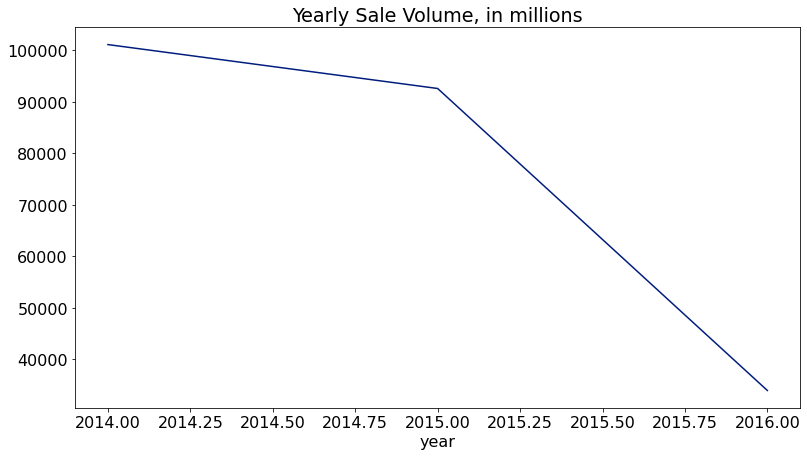

In [5]:
train.groupby('year').sales.sum().plot()
plt.title('Yearly Sale Volume, in millions')
plt.show()

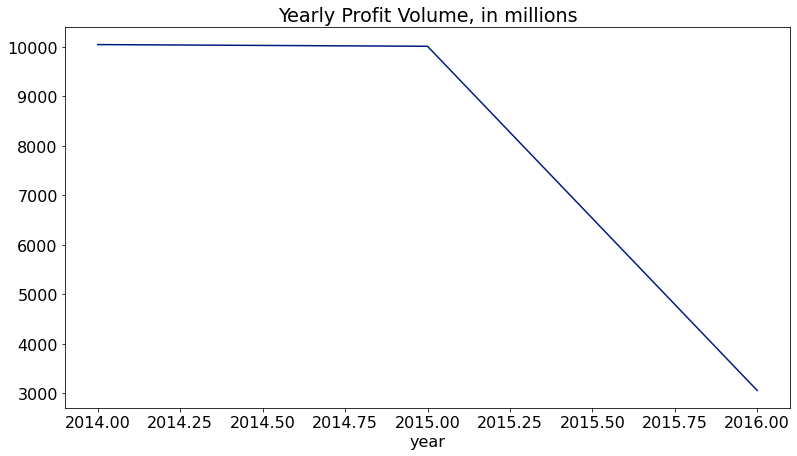

In [6]:
train.groupby('year').profit.sum().plot()
plt.title('Yearly Profit Volume, in millions')
plt.show()

**Take away: Both graphs show that there has been a steady drop in overall sales and profit since 2015.**

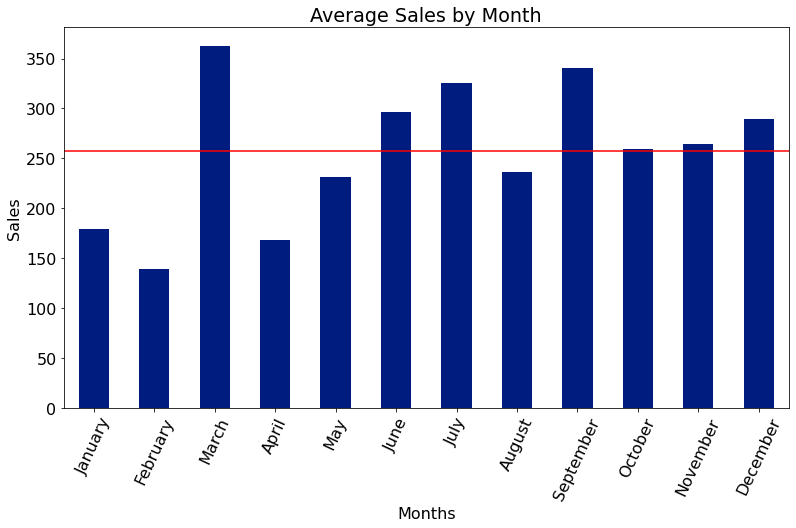

In [7]:
#What our average sales look like for each month?
train['month'] = pd.Categorical(train['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                            'September','October', 'November', 'December'])
overall_mean = train.groupby('month').sales.mean().mean()
train.groupby('month').sales.mean().plot.bar()
plt.title("Average Sales by Month")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.tick_params('x', rotation=65)
plt.axhline(overall_mean,color="r")
None

**Take away: The sales in Jan, Feb, Apr, May and Aug are under the average sales**

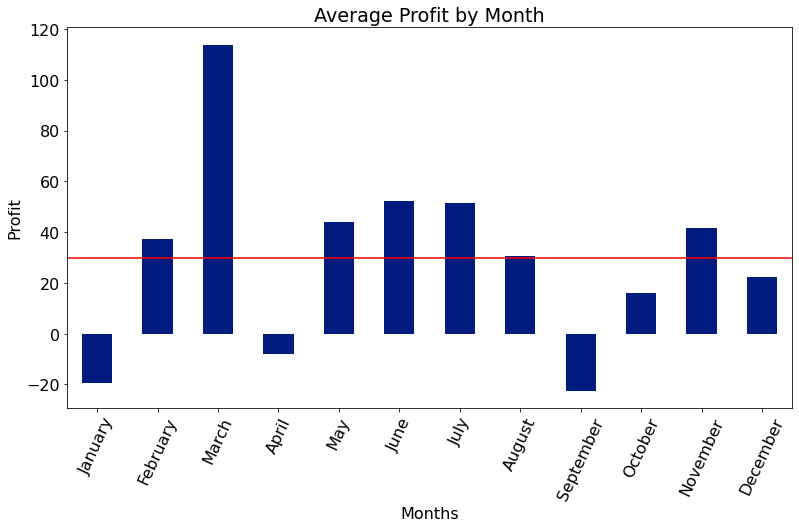

In [8]:
#What our average profit look like for each month?
train['month'] = pd.Categorical(train['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                                            'September','October', 'November', 'December'])
overall_mean = train.groupby('month').profit.mean().mean()
train.groupby('month').profit.mean().plot.bar()
plt.title("Average Profit by Month")
plt.xlabel("Months")
plt.ylabel("Profit")
plt.tick_params('x', rotation=65)
plt.axhline(overall_mean,color="r")
None

**Take away: Suprisingly to see Feb and May able to make profit, expect it below the average profit since the overall sales isnt that good**

<AxesSubplot:title={'center':'Seasonal Plot of Sales'}, xlabel='Order Date'>

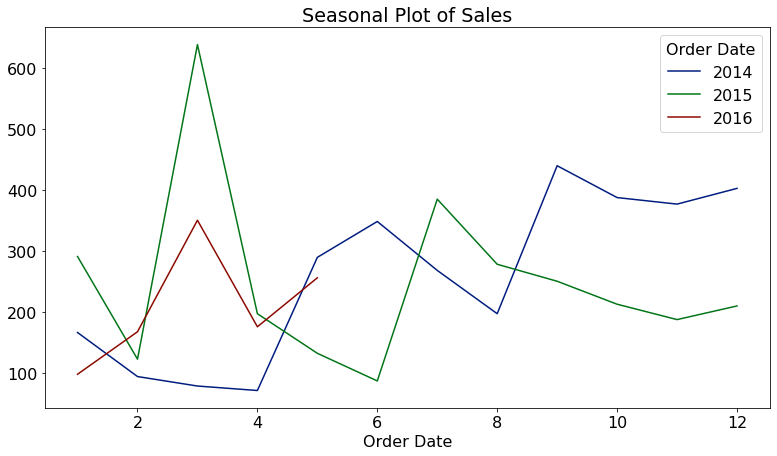

In [9]:
#Plot the overall average sales over time
y = train.sales
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot of Sales')

**Take away: We see a spike in overall sales in March, higher than average sales in the summer months and at the end of the year, as well as another spike in September.**

<AxesSubplot:title={'center':'Seasonal Plot of Profit'}, xlabel='Order Date'>

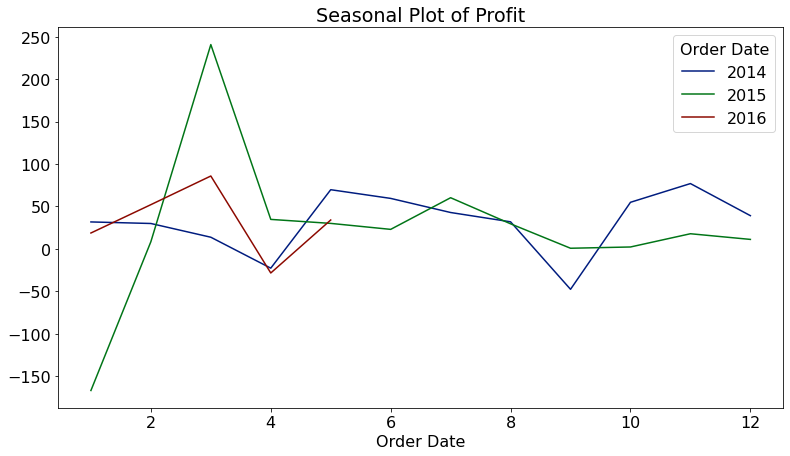

In [10]:
#Plot the overall average profit over time
y = train.profit
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot of Profit')

**Take away: We see an increase overall profit for 2015, espcially for month of March has huge spike and then almost the same as 2014.**

### Our exploration was guided by the following questions: 
#### - Is there a product category that is particularly profitable for us? 

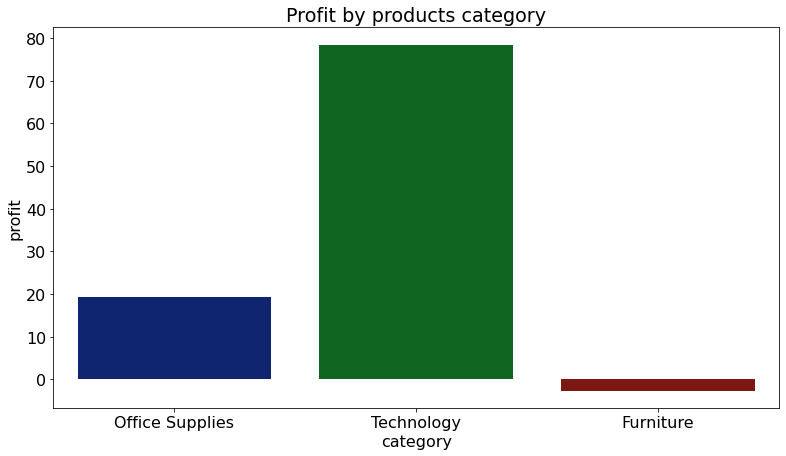

In [11]:
sns.barplot(x='category', y='profit', data= train, ci=None)
plt.title('Profit by products category')
None

**Takeaway: Technology is by far the most profitable product category.**

#### - Does one or another category stand out in terms of sales volume?

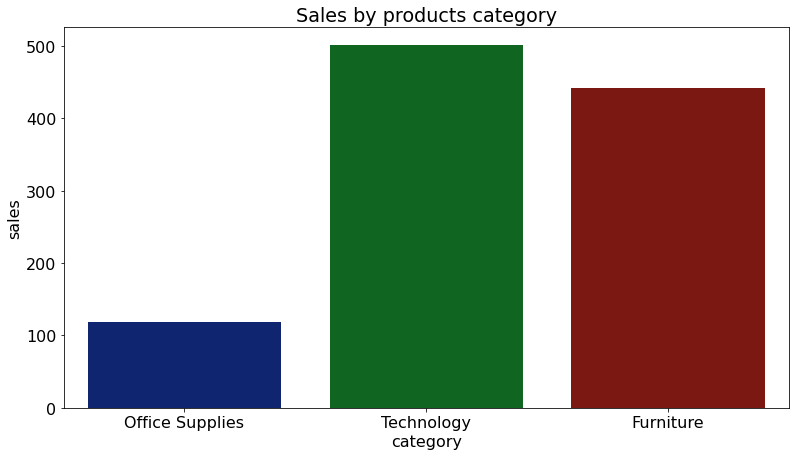

In [12]:
sns.barplot(x='category', y='sales', data= train, ci=None)
plt.title('Sales by products category')
None

**Takeway: Technology also leads in sale volume but furniture is a close second.**

#### Next we decided to visualize the Sales Volume by Product Categories Over Time

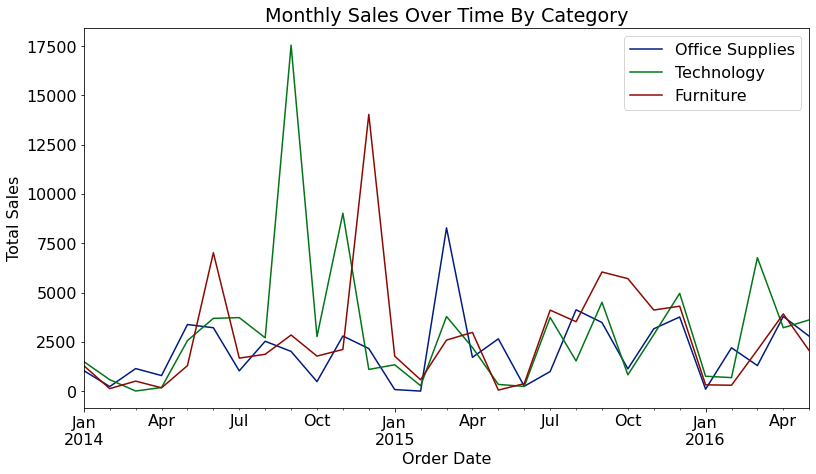

In [13]:
#Plotting total sales by category over time
for c in train.category.unique():
    sample = train[train.category == c]
    sample.resample('M').sales.sum().plot(label=c)
    plt.legend()
plt.title("Monthly Sales Over Time By Category")
plt.ylabel("Total Sales")
None

**Takeway: Most of our technology sales are occuring around August and September. We also see a large spike in furniture sales at the end of the year.**

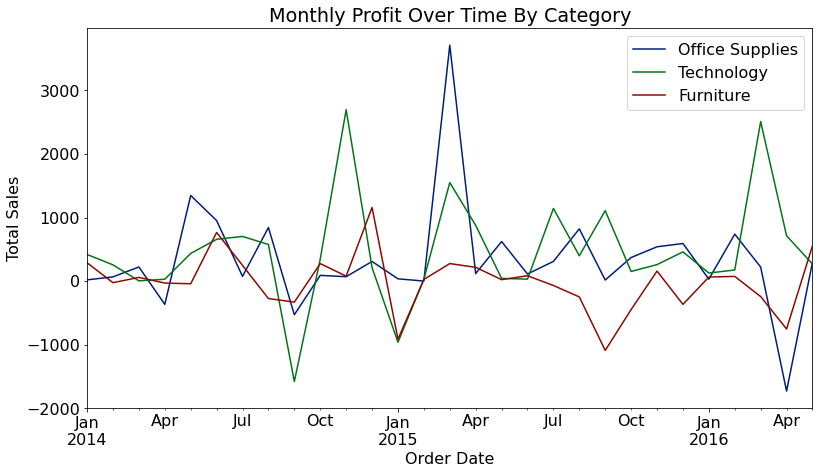

In [14]:
#Plotting total profit by category over time
for c in train.category.unique():
    sample = train[train.category == c]
    sample.resample('M').profit.sum().plot(label=c)
    plt.legend()
plt.title("Monthly Profit Over Time By Category")
plt.ylabel("Total Sales")
None

**Takeway: Eventhough office supplies have huge spike in April 2015 but technology most profitable overall.**

#### - Does the profitability and sales volume of the product categories vary by customer segment?

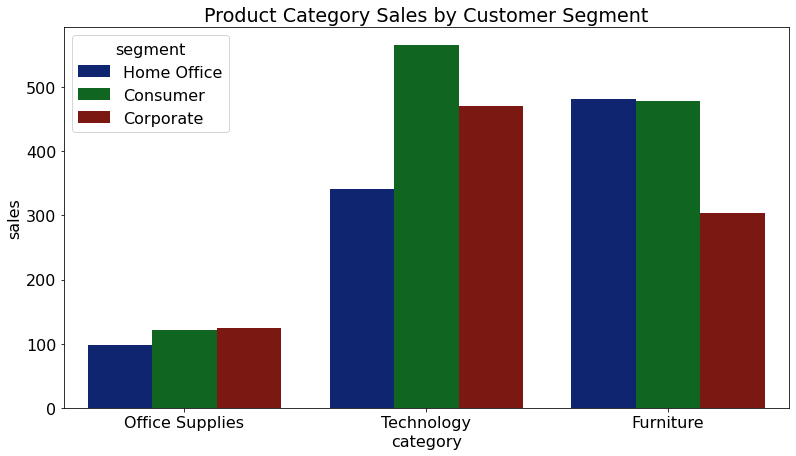

In [15]:
sns.barplot(x='category', y='sales', data= train, hue='segment', ci=None)
plt.title('Product Category Sales by Customer Segment')
None

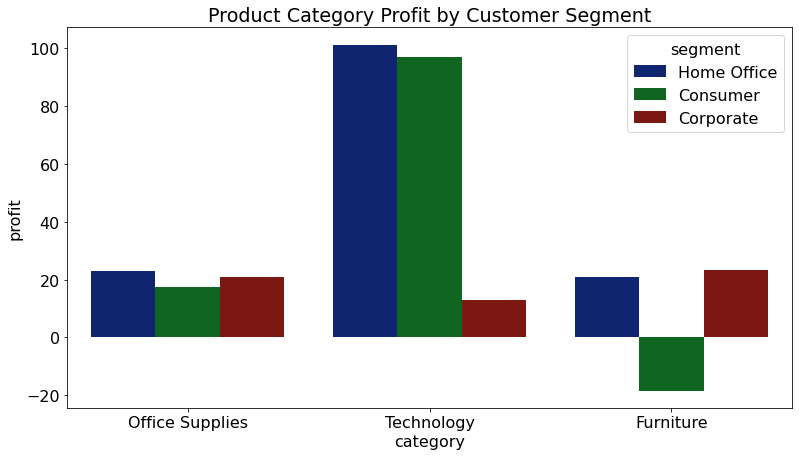

In [16]:
# Let's visualize the same thing using profit instead of sales
sns.barplot(x='category', y='profit', data= train, hue='segment', ci=None)
plt.title('Product Category Profit by Customer Segment')
None

**Takeways: The consumer and home office customer segments are the most profitable segments. While corporate customers make up a large portion of our sales volume they are the least profitable customers.**

### We established technology as the most profitable product category and decided to dive deeper into its subcategories.

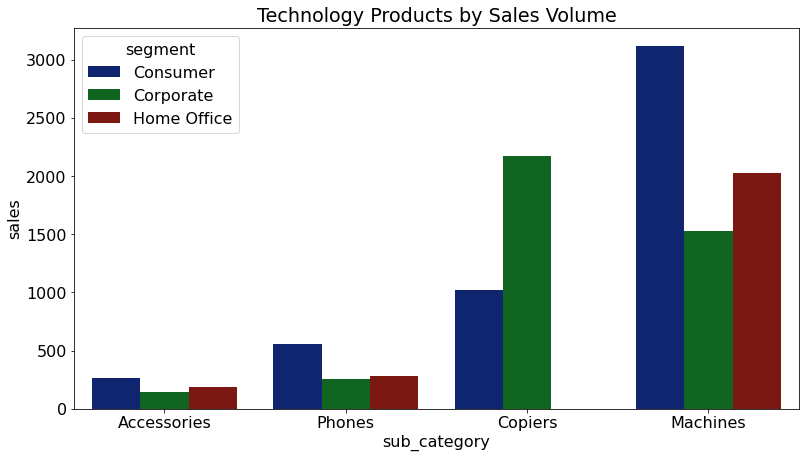

In [17]:
# Create a dateframe including only technology products
technology = train.loc[train['category'] == 'Technology']
sns.barplot(x='sub_category', y='sales', data= technology, hue='segment', ci=None)
plt.title('Technology Products by Sales Volume')
None

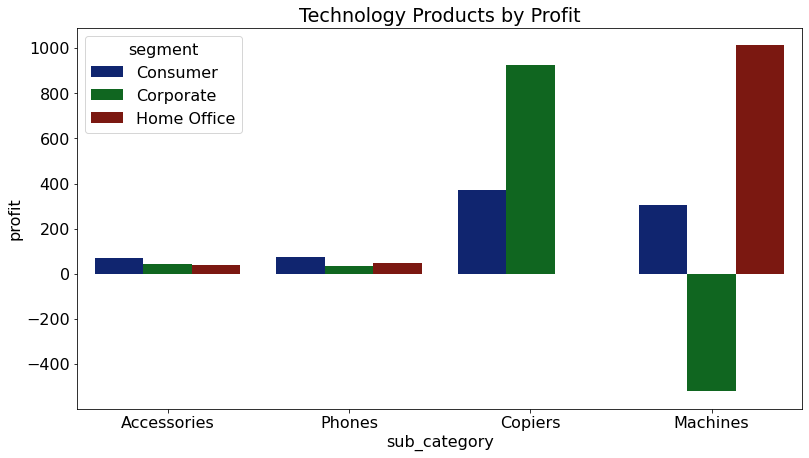

In [18]:
sns.barplot(x='sub_category', y='profit', data= technology, hue='segment', ci=None)
plt.title('Technology Products by Profit')
None

**Takeways:**
- Copiers and machines make up the bulk of both sale volume and profit. 
- While machines are very profitable for home office customers, we lost money selling machines to corporate customers. 

#### We wanted to look at sales by decomposing our time series into trend, seasonal, and noise components.

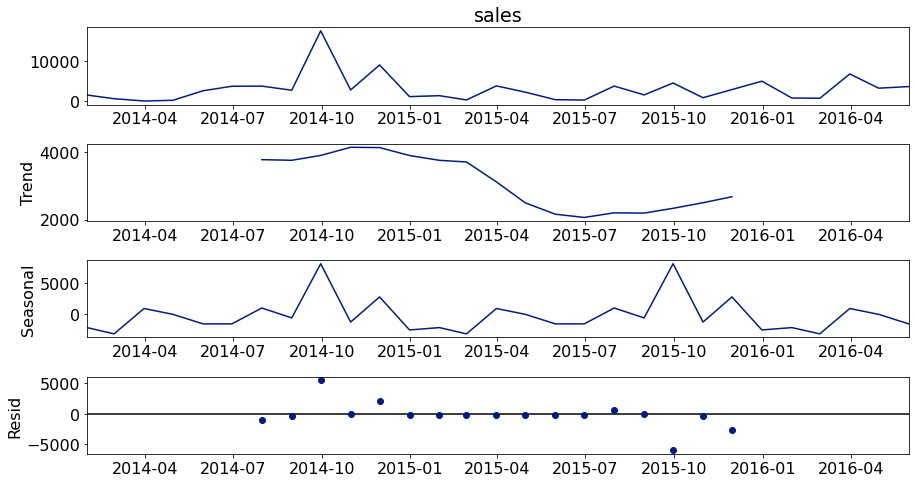

In [19]:
# Using decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.
y = technology.resample('M').sales.sum()
sm.tsa.seasonal_decompose(y).plot()
None

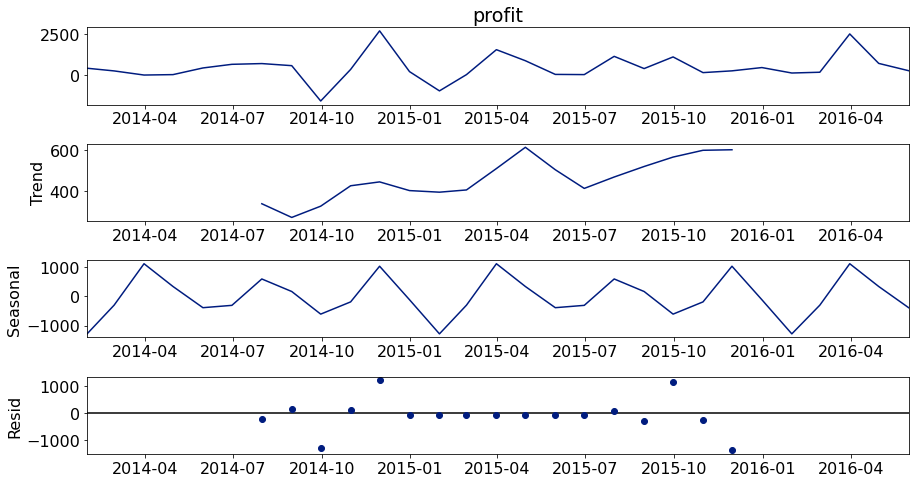

In [20]:
#Show the seasonal decompose for profit
y = technology.resample('M').profit.sum()
sm.tsa.seasonal_decompose(y).plot()
None

**Takeways: The 2 figures above clearly shows the seasonality in our data, and the trend is gradually increasing through the years.**

#### Summary of Takeaways from Exploration: 

- The most profitable and largest product category in terms of sales volume is technology.
    - Within this product category, our most profitable sub-categories are machines and copiers.
- We see a spike in technology sales between the months of August and October.
- Corporate customers make up a large portion of technology sales volume but they are the least profitable customer segment.
- Machines and copiers are our most profitable technology products but machine sales to corporate customers are unprofitable.
- Our seasonal decompose analysis shows a gradual upward trend in profit for technology products.

---

## Modeling

We will working with *prophet* for model because Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. Please check model.py for more detail (https://github.com/Kristofer-Rivera-and-Oliver-Ton/time_series_project/blob/main/model.py)

---

In [21]:
#Create model
with m.suppress_stdout_stderr():
    technology_sales_model, technology_sales_forecast, technology_profit_forecast, technology_profit_model = m.create_model(train, 'category', 'Order Date', 'sales', 'profit')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


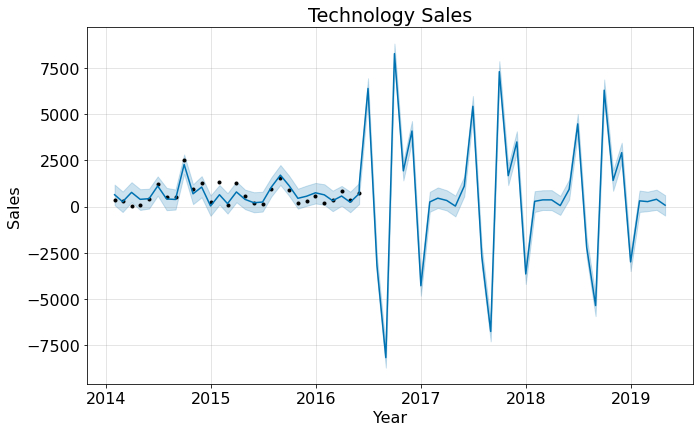

In [22]:
#Forecasting future sales for technologies
technology_sales_model.plot(technology_sales_forecast, xlabel = 'Year', ylabel = 'Sales')
plt.title('Technology Sales')
plt.show()

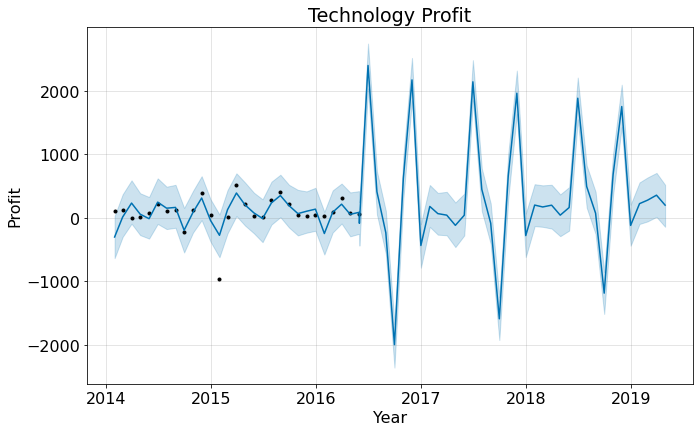

In [23]:
#Forecasting future profit for technologies
technology_profit_model.plot(technology_profit_forecast, xlabel = 'Year', ylabel = 'Profit')
plt.title('Technology Profit')
plt.show()

**Take away:
As you can see, if we take the recommendations,  our sales and profit are increase over time and continue to grow.**

---

### Conclusion

The goal of this report was to make a data-backed recommendation on which of SuperStore's product lines we should expand.

### Recommendations

- Based on our analysis, we recommend that we expand upon our most profitable product types within the technology category. These are machines and copiers.

- We recommend that we reduce or eliminate sales of machines to corporate customers as these are not profitable for us. Instead, we should try to increase sales in the Home Office and Consumer segments.

- Our model forecasts an increase in technology sales over the next 3 years. If we expand upon this product category, particularly our most profitable product types we can expect a significant increase in profits.


### Next steps

Given more time we would like to: 
 - Try different models to forecast future sales and profit
 - See if region, city or country contributes to product sales and profit 
 - Create a brand column and explore whether certain product brands are more profitable or sell more than others.